In [1]:
import sys
sys.path.append("/home4/s4683099/Deep-AGN-Clean")

# Load the data

In [2]:
from data_pipeline import (
    FilepathGetter,
    ForgeData,
    GalaxyDataset,
    FitsLoader
)

# Define the path to the data directory
PATH = "/scratch/s4683099/data_JWST"

# Instantiate the FilepathGetter with the specified path
getter = FilepathGetter(path=PATH)

# Get the data files and their keys
files_dict, keys = getter.get_data()


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Found 920060 .fits files in /scratch/s4683099/data_JWST                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 *****************************  Getting data from path...  ***************************** 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Found 131423 unique (snXXX, unique_id) pairs.                                            │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 *****************************  Data retrieval completed.  ***************************** 〛


# Prepare the data for training

In [3]:
import random

# Randomly sample 200 keys from the available keys
# This ensures that we only work with a manageable subset of the data
sampled_keys = random.sample(keys, 200)

# Create a reduced files_dict with only the sampled keys
reduced_files_dict = {k: files_dict[k] for k in sampled_keys}

# Create an instance of the ForgData class
forger = ForgeData()

# Forge the sets
X_train, y_train, X_val, y_val, X_test, y_test = forger.forge_training_data(
    file_groups=reduced_files_dict,
    train_ratio=0.7,
    val_ratio=0.1,
    test_ratio=0.2
)

# Create the datasets using the GalaxyDataset class
train_dataset = GalaxyDataset(X_train, y_train)
val_dataset = GalaxyDataset(X_val, y_val)
test_dataset = GalaxyDataset(X_test, y_test)

# Create an instance of FitsLoader to load FITS files
train_loader = FitsLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = FitsLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = FitsLoader(test_dataset, batch_size=64, shuffle=False)

〚 **********************************  Forging data...  ********************************** 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Set: X-Y                                                                                 │
│ Train: 840-840                                                                           │
│ Validation: 120-120                                                                      │
│ Test: 240-240                                                                            │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 *****************************  Data forged successfully!  ***************************** 〛


# Avaliable models

In [6]:
from networks.models import AVALAIBLE_MODELS

for model_name, _ in AVALAIBLE_MODELS.items():
    print(f"Model: {model_name}")

Model: AttentionUNET
Model: PatchGANUNet
Model: UNet


# Train a model using the trainer

In [7]:
from model_training import Trainer, AVALIABLE_LOSS_FUNCTIONS

# Print available loss functions
for loss_name in AVALIABLE_LOSS_FUNCTIONS:
    print(f"Loss Function: {loss_name}")

Loss Function: PSF-Constrained MSE Loss
Loss Function: PSF-Constrained Smooth L1 Loss
Loss Function: L1 + Weighted L2 Loss
Loss Function: MSE Loss
Loss Function: L1 Loss
Loss Function: Perceptual Loss
Loss Function: Smooth L1 Loss
Loss Function: PSF-MSE Loss
Loss Function: PSF-L1 Loss
Loss Function: Masked PSF-MSE Loss
Loss Function: Weighted PSF-MSE Loss
Loss Function: Weighted MSE Loss
Loss Function: Weighted MSE Loss Torch
Loss Function: MSE Loss for PSF
Loss Function: Weighted Squared MSE Loss
Loss Function: Weighted PSF-MSE Loss for PSF


In [8]:
trainer = Trainer(
    model_type="UNet", # Specify the type of model you want to train. This should be a valid model type from AVALAIBLE_MODELS
    model_name="my_model", # This is the name of the model you want to train
    data_folder="/home4/s4683099/Deep-AGN-Clean/examples/results", # This is the folder that the data will be saved to
)

trainer.train_model(
    train_loader=train_loader,
    val_loader=val_loader,
    loss_name="L1 Loss", # This should be valid loss function name from AVALIABLE_LOSS_FUNCTIONS
    lr=1e-3,
    num_epochs=10,
)

BasicUNet features: (32, 32, 64, 128, 256, 32).
〚 ********************************  Training started...  ******************************** 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Training `UNet` model with `L1 Loss` loss function.                                      │
│ Model name: my_model                                                                     │
│ Data folder: /home4/s4683099/Deep-AGN-Clean/examples/results                             │
│ Batch size: 64                                                                           │
│ Number of workers: 0                                                                     │
│ Training data size: 840                                                                  │
│ Validation data size: 120                                                                │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 ********************

Epochs left...:  10%|█         | 1/10 [00:26<03:58, 26.47s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 0 with validation loss: 0.0624                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  20%|██        | 2/10 [00:28<01:38, 12.30s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 1 with validation loss: 0.0504                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  30%|███       | 3/10 [00:31<00:54,  7.73s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 2 with validation loss: 0.0446                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  40%|████      | 4/10 [00:33<00:33,  5.60s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 3 with validation loss: 0.0427                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  50%|█████     | 5/10 [00:35<00:22,  4.43s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 4 with validation loss: 0.0412                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  60%|██████    | 6/10 [00:38<00:14,  3.72s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 5 with validation loss: 0.0404                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  70%|███████   | 7/10 [00:40<00:09,  3.26s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 6 with validation loss: 0.0388                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  80%|████████  | 8/10 [00:42<00:05,  2.96s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 7 with validation loss: 0.0376                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  90%|█████████ | 9/10 [00:45<00:02,  2.78s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 8 with validation loss: 0.0375                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...: 100%|██████████| 10/10 [00:47<00:00,  4.75s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 9 with validation loss: 0.0352                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

# Finetune model

In [10]:
loading_params = {
    "filename": "my_model_epoch" # Use the epoch model so that we continue training from the last epoch
}
trainer.fine_tune_model(
    train_loader=train_loader,
    val_loader=val_loader,
    loss_name="L1 Loss", # This should be valid loss function name from AVALIABLE_LOSS_FUNCTIONS
    lr=1e-3,
    num_epochs=3,
    **loading_params)


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch` loaded successfully!                                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 ********************************  Training started...  ******************************** 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Training `UNet` model with `L1 Loss` loss function.                                      │
│ Model name: my_model                                                                     │
│ Data folder: /home4/s4683099/Deep-AGN-Clean/examples/results                             │
│ Batch size: 64                                                                           │
│ Number of workers: 0                                                                     │
│ Training data size: 840                                            

Epochs left...:  33%|███▎      | 1/3 [00:02<00:05,  2.52s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 0 with validation loss: 0.0331                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...:  67%|██████▋   | 2/3 [00:04<00:02,  2.41s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model.pth` saved successfully!Path to model:                        │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Best model saved at epoch 1 with validation loss: 0.0313                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────

Epochs left...: 100%|██████████| 3/3 [00:07<00:00,  2.40s/it]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_epoch.pth` saved successfully!Path to model:                             │
│ /home4/s4683099/Deep-AGN-Clean/examples/results                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Checkpoint model saved at epoch 2!                                                       │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 *********************************  Logging epoch...  ********************************* 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Epoch: 13                                                                                │
│ Train Loss: 0.0360                                                 

# Visualising the training history

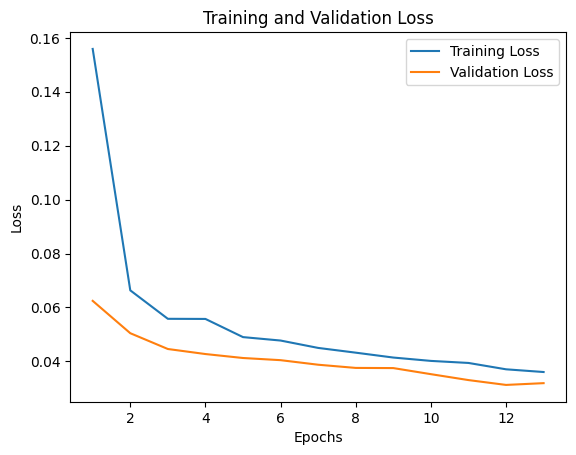

In [14]:
import json
import matplotlib.pyplot as plt

# Load the training history from the data folder
history_path = f"{trainer.data_folder}/history.json"
with open(history_path, 'r') as f:
    history = json.load(f)

train_loss = history["train_loss"]
val_loss = history["val_loss"]
epoch = history["epoch"]

plt.plot(epoch, train_loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
import pickle

# Saving the testing data
with open(f"{trainer.data_folder}/test_data.pkl", 'wb') as f:
    pickle.dump((X_test, y_test), f)